# Finding mRNA versus protein correlation for a single gene

In [1]:
import cptac
import cptac.utils as ut
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statistics

In [2]:
luad = cptac.Luad()

In [3]:
joined = luad.join_omics_to_omics("proteomics","transcriptomics")
joined = ut.reduce_multiindex(df = joined, levels_to_drop="Database_ID")
tp53_proteomics = joined["TP53_proteomics"]
tp53_transcriptomics = joined["TP53_transcriptomics"]

cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (<ipython-input-3-c5951d298aef>, line 2)


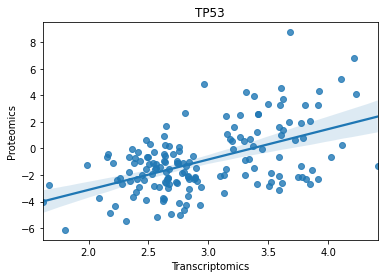

In [4]:
fig = sns.regplot(x=tp53_transcriptomics,y=tp53_proteomics)
fig.set(xlabel="Transcriptomics", ylabel="Proteomics")
plt.title("TP53")
plt.show()

cptac warning: Due to dropping the specified levels, dataframe now has 2 duplicated column headers. (/opt/anaconda3/lib/python3.8/site-packages/cptac/dataset.py, line 697)


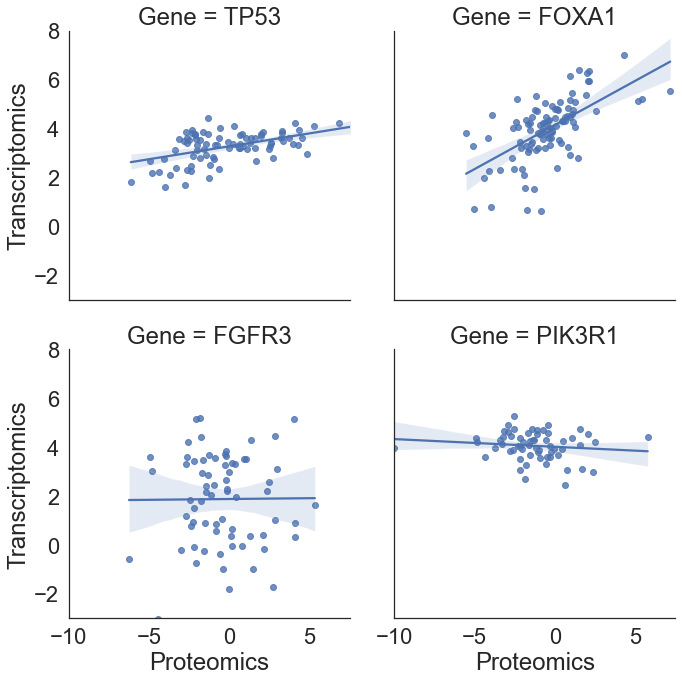

In [5]:
genes = ['TP53','FOXA1','FGFR3','PIK3R1']
protein_col = []
rna_col = []
gene_col = []
prot_trans = luad.multi_join({'proteomics' : genes, 'transcriptomics': genes}, tissue_type = 'tumor',levels_to_drop=["Database_ID"])
prot_trans = prot_trans.loc[:,~prot_trans.columns.duplicated()]
for i in genes:
    prot_trans_col = prot_trans[[i+'_proteomics', i+'_transcriptomics']]
    prot_trans_col = prot_trans_col.dropna()
    protein_col = protein_col + list(prot_trans_col[i+'_proteomics'])
    rna_col = rna_col + list(prot_trans_col[i+'_transcriptomics'])
    gene_col = gene_col + [i]*len(list(prot_trans_col[i+'_transcriptomics']))
    
sns.set(style='white',font_scale=2)
cols = {'Proteomics' : protein_col, 'Transcriptomics': rna_col, 'Gene' : gene_col }
df = pd.DataFrame(cols)
plot = sns.lmplot(x="Proteomics", y="Transcriptomics", col="Gene", data=df, col_wrap=2);
axes = plot.axes
axes[0].set_ylim(-3,8)
axes[0].set_xlim(-10,7.5)
plt.show()

